# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:

fifa['ValueNumeric'] = pd.to_numeric(fifa['Value'].str.extract('(\d*\.?\d+)', expand=False))

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("ValueNumeric ~ C(fifa['Preferred Foot']) + C(fifa['Position'])", data=fifa).fit()
table = sm.stats.anova_lm(model, typ=2)
table
# https://pythonfordatascience.org/anova-python/

,sum_sq,df,F,PR(>F)
C(fifa['Preferred Foot']),7.292211e+04,1.0,0.871795,3.504713e-01
C(fifa['Position']),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


In [6]:
formula = "ValueNumeric ~ C(fifa['Preferred Foot']) + C(fifa['Position'])"
lm = ols(formula, data=fifa).fit()
print(lm.summary())
# https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.020
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           1.07e-11
Time:                        17:58:40   Log-Likelihood:            -1.2858e+05
No. Observations:               18147   AIC:                         2.572e+05
Df Residuals:                   18119   BIC:                         2.574e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

What is your conclusion from this ANOVA?

In [7]:
# Your conclusions here:

# F-Statistic: Variation Between Sample Means / Variation Within
# The high F-value (4.020) shows a case where the variability of group means is large relative to the within group variability. In order to reject the null hypothesis that the group means are equal, we need a high F-value.
# Is our F-value high enough? A single F-value is hard to interpret on its own. We need to place our F-value into a larger context before we can interpret it. To do that, we’ll use the F-distribution to calculate probabilities.
# Because the F-distribution assumes that the null hypothesis is true, we can place the F-value from our study in the F-distribution to determine how consistent our results are with the null hypothesis and to calculate probabilities.
# The probability that we want to calculate is the probability of observing an F-statistic that is at least as high as the value that our study obtained.
# That probability allows us to determine how common or rare our F-value is under the assumption that the null hypothesis is true. 
# If the probability is low enough, we can conclude that our data is inconsistent with the null hypothesis. The evidence in the sample data is strong enough to reject the null hypothesis for the entire population.
# This probability that we’re calculating is also known as the p-value
# In our ANOVA, the probability of observing an F-value that is at least as large as the F-value our study obtained is our p-value (1.07e-11).
# F-values fall within the F chart about 1.07e-11 of the time when the null hypothesis is true. 
# This probability is low enough to reject the null hypothesis using the common significance level of 0.05. We can conclude that not all the group means are equal.

# https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [8]:
# Your code here:

model = ols("ValueNumeric ~ C(fifa['Nationality'])", data=fifa).fit()
table = sm.stats.anova_lm(model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(fifa['Nationality']),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [9]:
# Same conclusions as before

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [10]:
# Your code here:

fifana = fifa.dropna()
fifana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
Name              17918 non-null object
Age               17918 non-null int64
Nationality       17918 non-null object
Overall           17918 non-null int64
Potential         17918 non-null int64
Club              17918 non-null object
Value             17918 non-null object
Preferred Foot    17918 non-null object
Position          17918 non-null object
Weak Foot         17918 non-null float64
Acceleration      17918 non-null float64
SprintSpeed       17918 non-null float64
Stamina           17918 non-null float64
Strength          17918 non-null float64
LongShots         17918 non-null float64
Aggression        17918 non-null float64
Interceptions     17918 non-null float64
Positioning       17918 non-null float64
Vision            17918 non-null float64
Penalties         17918 non-null float64
ValueNumeric      17918 non-null float64
dtypes: float64(12), int64(3), object(6)
m

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [11]:
# Your code here:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
import statsmodels.api as sm
X = sm.add_constant(fifana[['Stamina','SprintSpeed']])
Y = fifana['ValueNumeric']
model = sm.OLS(Y,X)
results = model.fit()
results.params

C:\Users\ecorti01\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          280.429706
Stamina         -0.517333
SprintSpeed      0.318616
dtype: float64

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Wed, 05 Feb 2020   Prob (F-statistic):             0.0116
Time:                        17:58:41   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:

# R-squared is a statistical measure of how close the data are to the fitted regression line. 
# R-squared = Explained variation / Total variation

# Our low R-squared value (0%) indicates that the model explains none of the variability of the response data around its mean.

# The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect).
# A low p-value (< 0.05) indicates that you can reject the null hypothesis.
# In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.
# In the OLS Regression Results, we can see that the predictor variables of Stamina are significant because its p-values are 0.000.
# However, the p-value for SprintSpeed (0.091) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant.

# https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [14]:
# Your code here:

X = sm.add_constant(fifana['Potential'])
Y=fifana['ValueNumeric']
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):          9.15e-225
Time:                        17:58:41   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [15]:
# Your conclusions here:

# In this model, our R-squared is slightly more representative than the previous model, meaning it explains part of the variability of the response data around its mean.
# On the other hand, our low p-value (< 0.05) indicates that we can reject the null hypothesis.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

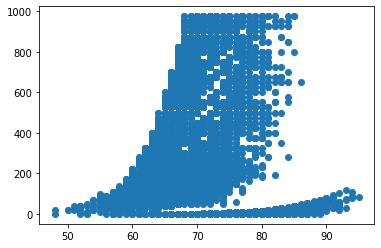

In [16]:
# Your code here:

import matplotlib.pyplot as plt
scatter=fifana[['ValueNumeric','Potential']]
plt.scatter(fifa['Potential'],fifa['ValueNumeric'])

In [17]:
# We can see linear relationship between both variables
# It seems there are two different trends or a line of outliers that could explain the low R-squared value.
# We can also understand there is relationship between both values resulting in p-value greater than 0.05.